Rami, Nicola Srour (2025)

title: Online retail dataset, decision tree

In [ ]:
# import needed libraries
import pandas as pd
import sklearn.model_selection
import sklearn.tree
import sklearn.metrics

In [ ]:
df = pd.read_excel("Online Retail.xlsx")
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [ ]:
# remove irrelevant columns
df = df.drop(['InvoiceNo', 'StockCode', 'CustomerID'], axis=1)
# remove duplicate values
df = df.drop_duplicates()
# remove null values
df = df.dropna()
df.head(2)

,Description,Quantity,InvoiceDate,UnitPrice,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom


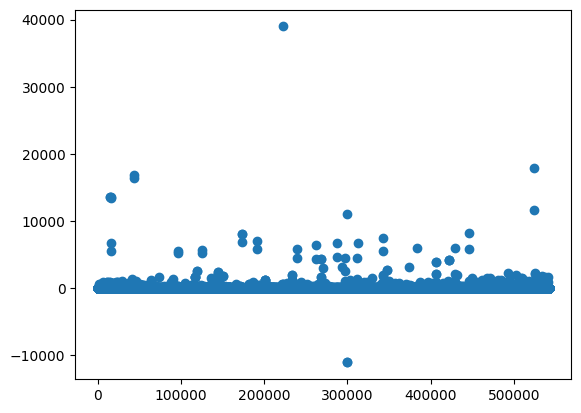

In [ ]:
# use scatter plot to remove outliers
import matplotlib.pyplot as plt

plt.scatter(df.index, df['UnitPrice'])
plt.show()

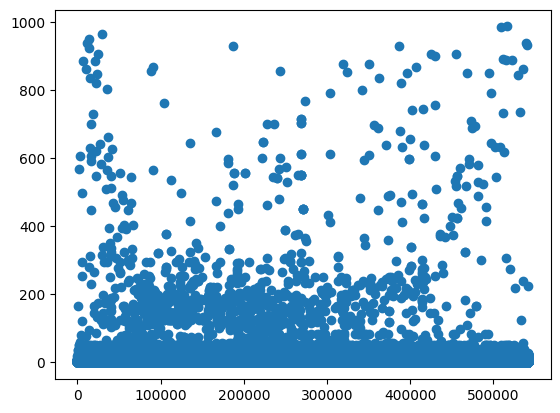

In [ ]:
df = df[df['UnitPrice'] < 1000]
df = df[df['UnitPrice'] > -3000]
plt.scatter(df.index, df['UnitPrice'])
plt.show()

In [ ]:
# finding unique values in each column with cateogrical values to know which encoding method to use
uniqueDescription = df['Description'].nunique()
uniqueCountry = df['Country'].nunique()
print(uniqueDescription, uniqueCountry)

4222 38


In [ ]:
# turn date column to date type data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# use label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Country'] = encoder.fit_transform(df['Country'])
df['InvoiceDate'] = encoder.fit_transform(df['InvoiceDate'])
df.head(3)

,Description,Quantity,InvoiceDate,UnitPrice,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,0,2.55,36
1,WHITE METAL LANTERN,6,0,3.39,36
2,CREAM CUPID HEARTS COAT HANGER,8,0,2.75,36


In [ ]:
# use tfidf vectorizer to encode desription column later
# turn description column to string at first to use tfidifvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
df['Description'] = df['Description'].astype(str)
v = TfidfVectorizer(max_features=10)
tfidfmatrxi = v.fit_transform(df['Description']).toarray()

In [ ]:
df['Description'] = tfidfmatrxi.tolist()
df.head(3)

,Description,Quantity,InvoiceDate,UnitPrice,Country
0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6,0,2.55,36
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6,0,3.39,36
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",8,0,2.75,36


In [ ]:
# install category encoder, then use Binary encoder and later use it on the description column
!pip install category_encoders

In [ ]:
import category_encoders as ce
enc = ce.BinaryEncoder(cols=['Description'])
df['Description'] = df['Description'].astype(str)
df = enc.fit_transform(df)

In [ ]:
# merge the columns i got from Binary Encoder, as it make the dataset more simple
c = ['Description_0', 'Description_1', 'Description_2', 'Description_3', 'Description_4', 'Description_5', 'Description_6']
df['Description'] = df[c].astype(str).agg(''.join, axis=1)
df = df.drop(['Description_0', 'Description_1', 'Description_2', 'Description_3', 'Description_4', 'Description_5', 'Description_6'], axis=1)
df.head(3)

,Quantity,InvoiceDate,UnitPrice,Country,Description
0,6,0,2.55,36,0000001
1,6,0,3.39,36,0000010
2,8,0,2.75,36,0000010


In [ ]:
# find standard deviaiton and the average of the target column, as it can help in explaining MSE results
avr = df['UnitPrice'].mean()
std = df['UnitPrice'].std()
print("Average:", avr )
print("Standard deviaiton: ", std)

Average: 3.7871408296738895
Standard deviaiton:  14.539953201127656


In [ ]:
# split the dataset and later train and test the machine leanring model
x = df.drop(['UnitPrice'], axis=1)
y = df['UnitPrice']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y)
print("df:", df.shape)
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

df: (534234, 5)
x_train: (400675, 4)
y_train: (400675,)
x_test: (133559, 4)
y_test: (133559,)


In [ ]:
tree = sklearn.tree.DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = tree.predict(x_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
results = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("decison tree result:", results)
print("R2 score:", r2)

decison tree result: 214.92240435456006
R2 score: -0.05098423332214086


Reference:
Chen, D. (2015). Online Retail [Dataset]. UCI Machine Learning Repository. Available at: https://doi.org/10.24432/C5BW33, (Accessed: 04/04/2025)